In [2]:
# Import pandas library and read csv file as a DataFrame
import pandas as pd
brexit = pd.read_csv("brexit_tweet_count_by_data.csv")

# Create a pivot table of brexit DataFrame
pivoted_df = brexit.pivot_table(
    values = ["total_count"], 
    index = ["date"], 
    columns = ["retweet"],
    )

# Rename columns in pivoted_df 
pivoted_df.columns = ['tweets', 'retweets']

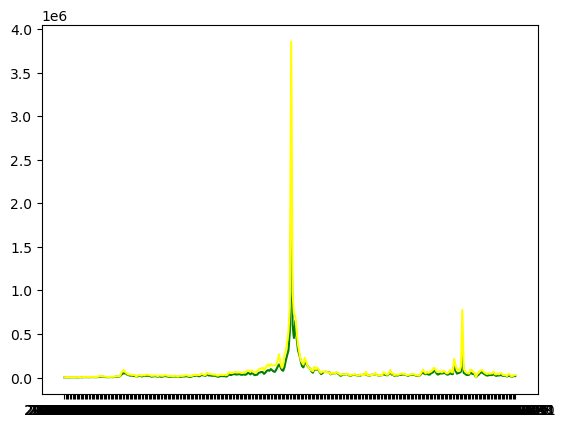

In [3]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Plot a graph for each column 
plt.plot(pivoted_df.index, pivoted_df['tweets'], label = 'tweets', color = "green")
plt.plot(pivoted_df.index, pivoted_df['retweets'], label = 'retweets', color = "yellow")

In [4]:
# Create a new column named total that sums the tweet and retweet datapoints
pivoted_df ['total'] = pivoted_df ['tweets'] + pivoted_df ['retweets']

# Sort values of column 'total' in descending order 
# and select the top 10 entries
ten_most = pivoted_df.sort_values (by = 'total', ascending = False).head(10)



In [13]:
# Create a list of the top 10 index entries in ten_most and print it
print(ten_most.index.to_list())

print("These 10 dates are significant because they show that the spike in the brexit-related tweet and retweet counts coincide with the period directly afterwhich the UK voted to leave the EU. They also reveal the public's reaction to the event's occurence and the intensity of their reaction.")

['2016-06-24', '2016-06-25', '2016-06-27', '2016-06-23', '2016-06-26', '2016-11-09', '2016-06-28', '2016-06-22', '2016-06-29', '2016-06-21']
These 10 dates are significant because they show that the spike in the brexit-related tweet and retweet counts coincide with the period directly afterwhich the UK voted to leave the EU. They also reveal the public's reaction to the event's occurence and the intensity of their reaction.


In [6]:
# Convert index in pivoted_df Dataframe from strings to datetime objects
pivoted_df.index = pd.to_datetime(pivoted_df.index)

# Create a copy of pivoted_df
pivoted_later = pivoted_df.copy()

# Replace each datetime object with the corresponding day name
pivoted_df.index = pivoted_df.index.day_name()


In [7]:
# Group pivoted_df by its index and sum each group
grouped_df = pivoted_df.groupby(pivoted_df.index).sum()

In [8]:
# Sort grouped_df DataFrame by the 'tweets' column in descending order
reordered = grouped_df.sort_values (by = 'tweets', ascending = False)

In [9]:
# Display the first row of 'reordered' DataFrame 
display(reordered.head(1))

print('Friday is the day with the highest average tweet count.')

,tweets,retweets,total
date,,,
Friday,3697677.0,6133772.0,9831449.0


Friday is the day with the highest average tweet count.


In [10]:
# Sort values in pivoted_later DataFrame by 'total' column in descending order
drop_df = pivoted_later.sort_values('total', ascending = False)

# Remove top 10 dates in drop_df 
new_df = drop_df[11:]

In [11]:
# Convert index in new_df from strings to datetime objects
new_df.index = pd.to_datetime(new_df.index)

# Create a copy of new_df
new_later = new_df.copy()

# Replace each datetime object in new_df with its corresponding day name
new_df.index = new_df.index.day_name()

# Group new_df by its index and sum each group
new_grouped_df = new_df.groupby(new_df.index).sum()

# Sort new_grouped_df by 'tweets' column in descending order
new_reordered_df = new_grouped_df.sort_values (by = 'tweets', ascending = False)

In [12]:
# Display the first row of new_reordered_df
display(new_reordered_df.head(1))

print("Monday is the day with the most tweets after spikes' removal.")

,tweets,retweets,total
date,,,
Monday,1843116.0,2625267.0,4468383.0


Monday is the day with the most tweets after spikes' removal.
